In [1]:
# import the libraries
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt+
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("HeartDisease.csv")
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [3]:
df.shape

(1025, 14)

In [4]:
df.info()   # information on the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [5]:
df.isna().sum()  # check the null values

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [6]:
df.describe()  #  check the numerical column

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [7]:
df.value_counts('target')

target
1    526
0    499
Name: count, dtype: int64

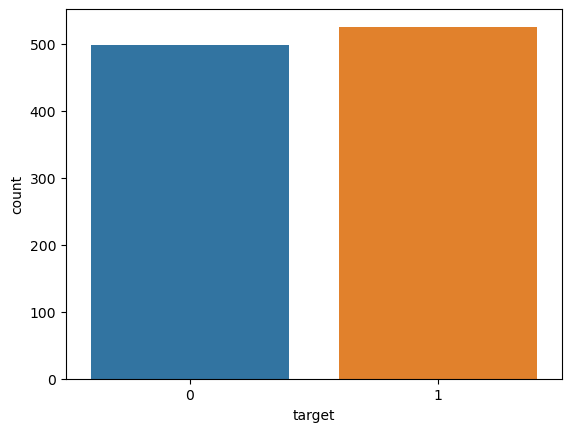

In [8]:
sns.countplot(x='target',data=df)
plt.show()      #Analysing the 'target' variable

In [9]:
chest_pain_count=df.value_counts("chest_pain_type")
chest_pain_count

chest_pain_type
Typical angina      497
Non-anginal pain    284
Atypical angina     167
Asymptomatic         77
Name: count, dtype: int64

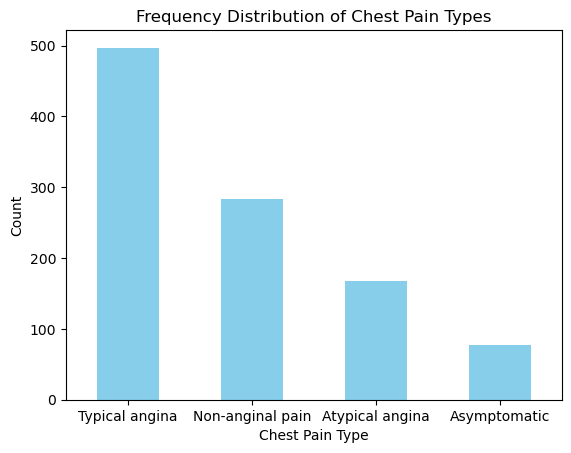

In [10]:
chest_pain_count.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show() 

In [11]:
heart_rate=df.value_counts('Max_heart_rate')
heart_rate

Max_heart_rate
162    35
160    31
163    29
152    28
173    28
       ..
177     3
121     3
128     3
137     3
106     3
Name: count, Length: 91, dtype: int64

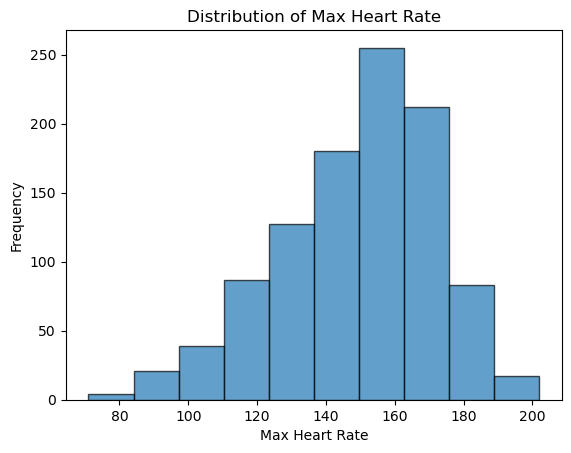

In [12]:
df['Max_heart_rate'].plot.hist(bins=10, alpha=0.7, edgecolor='black')
plt.title('Distribution of Max Heart Rate')
plt.xlabel('Max Heart Rate')   # data distrubution 
plt.ylabel('Frequency')
plt.show()             

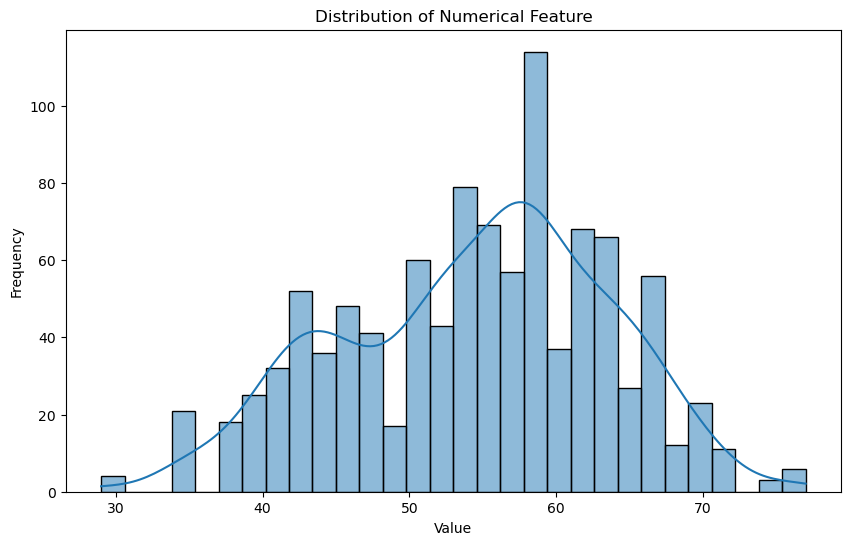

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Numerical Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

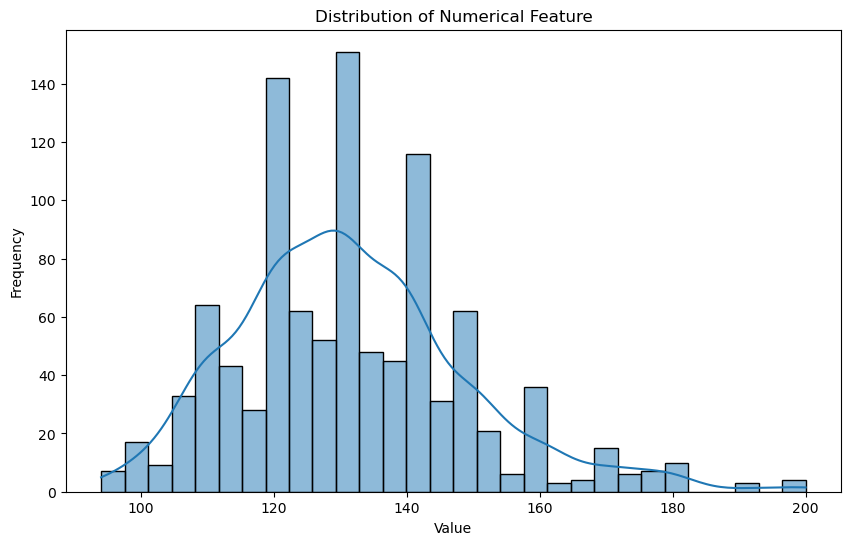

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['resting_blood_pressure'], bins=30, kde=True)
plt.title('Distribution of Numerical Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

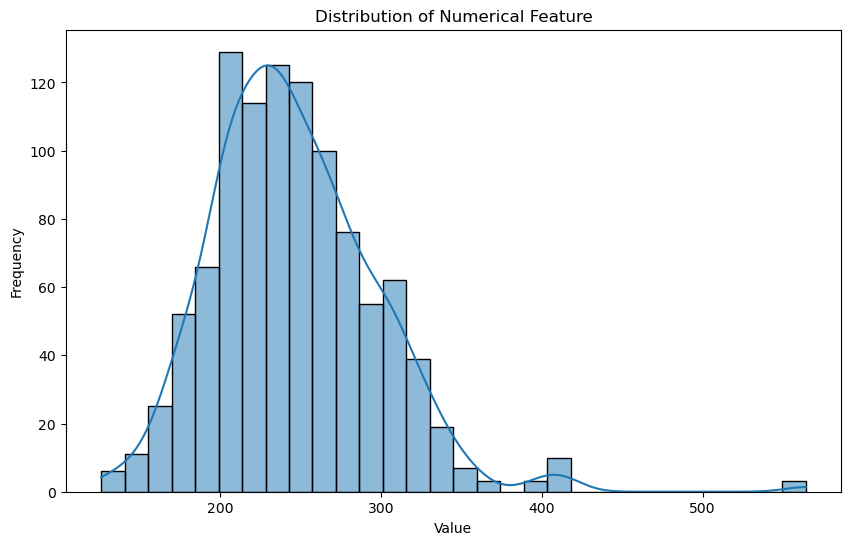

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cholestoral'], bins=30, kde=True)
plt.title('Distribution of Numerical Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

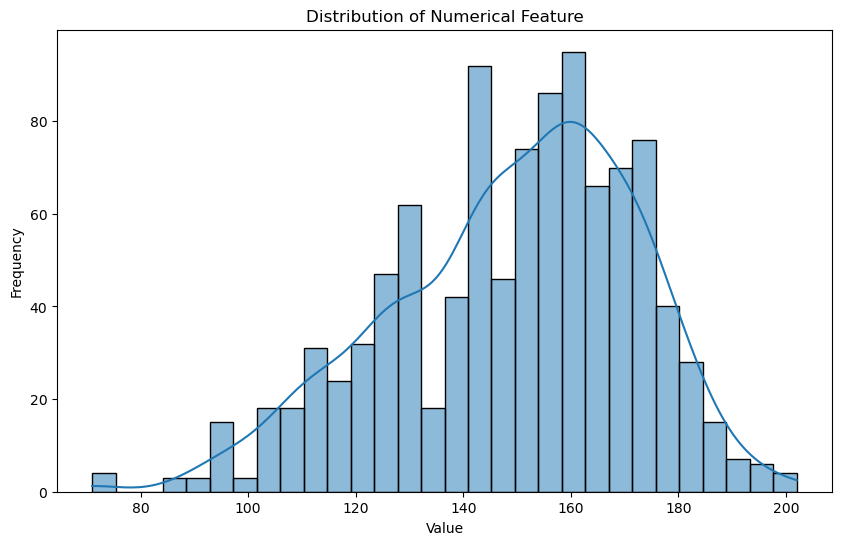

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Max_heart_rate'], bins=30, kde=True)
plt.title('Distribution of Numerical Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

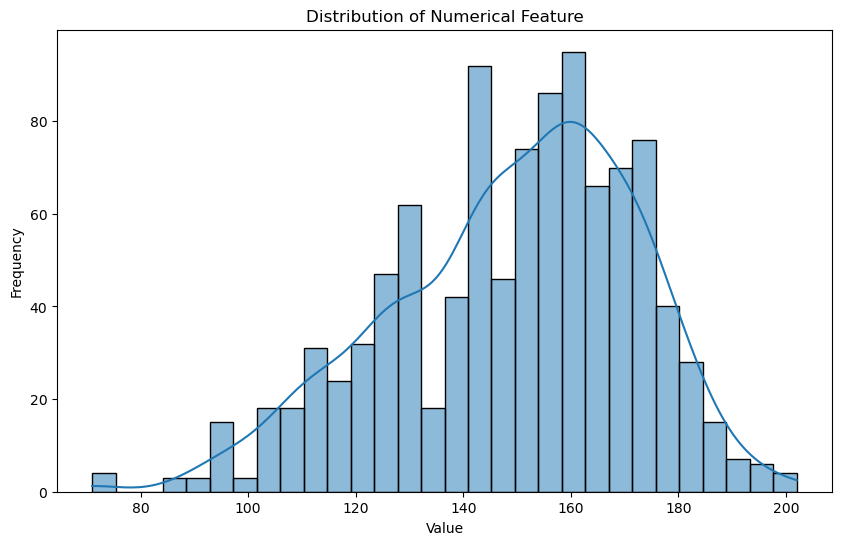

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Max_heart_rate'], bins=30, kde=True)
plt.title('Distribution of Numerical Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

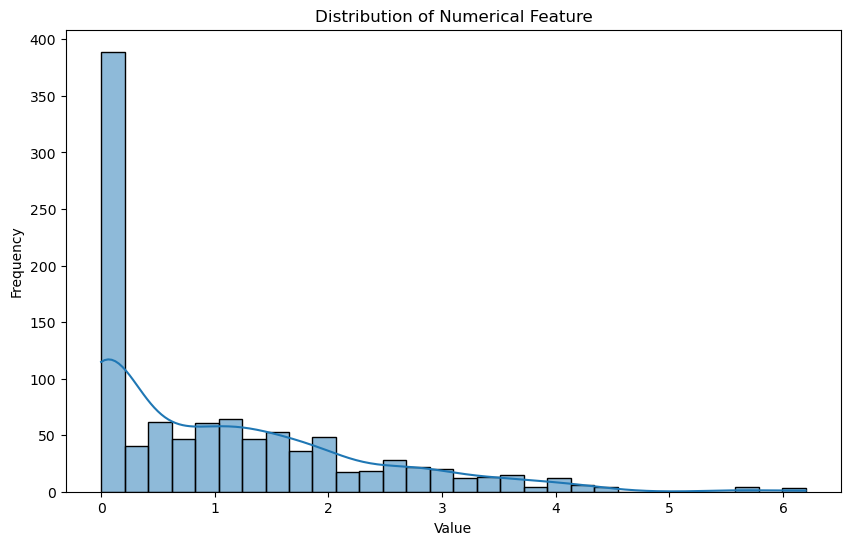

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['oldpeak'], bins=30, kde=True)
plt.title('Distribution of Numerical Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [19]:
#handle the outliers 

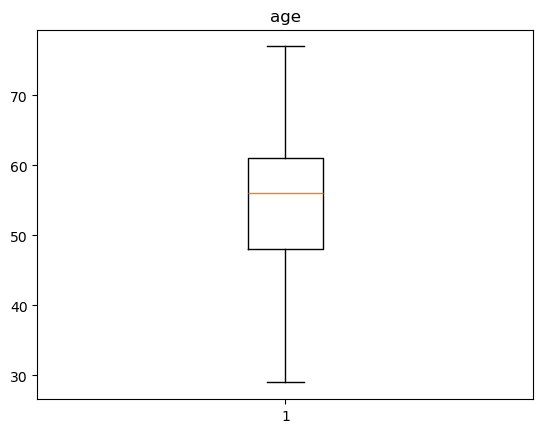

In [20]:

plt.boxplot(df["age"])
plt.title("age")
plt.show()

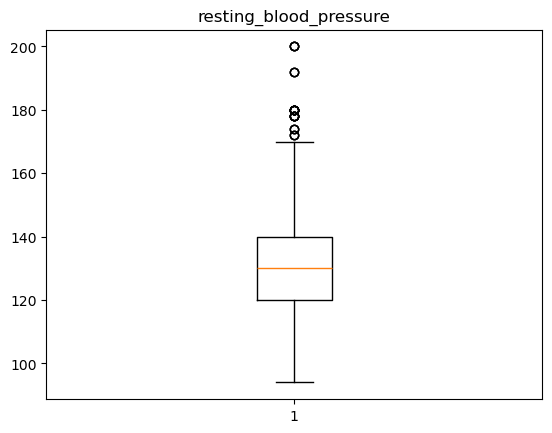

In [21]:
plt.boxplot(df["resting_blood_pressure"]) 
plt.title("resting_blood_pressure")
plt.show()

In [22]:
q1=df['resting_blood_pressure'].quantile(0.25)
q3=df['resting_blood_pressure'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)  # UPERR BOUND
lb=q1-(1.5*iqr)  # LOWER BOUND

In [23]:
df.loc[df["resting_blood_pressure"]>ub]

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
29,55,Female,Typical angina,180,327,Lower than 120 mg/ml,Left ventricular hypertrophy,117,Yes,3.4,Flat,Zero,Fixed Defect,0
47,66,Female,Typical angina,178,228,Greater than 120 mg/ml,ST-T wave abnormality,165,Yes,1.0,Flat,Two,Reversable Defect,0
87,59,Female,Typical angina,174,249,Lower than 120 mg/ml,ST-T wave abnormality,143,Yes,0.0,Flat,Zero,Fixed Defect,0
137,64,Female,Typical angina,180,325,Lower than 120 mg/ml,ST-T wave abnormality,154,Yes,0.0,Downsloping,Zero,Fixed Defect,1
151,54,Male,Atypical angina,192,283,Lower than 120 mg/ml,Normal,195,No,0.0,Downsloping,One,Reversable Defect,0
175,56,Female,Typical angina,200,288,Greater than 120 mg/ml,Normal,133,Yes,4.0,Upsloping,Two,Reversable Defect,0
229,66,Female,Typical angina,178,228,Greater than 120 mg/ml,ST-T wave abnormality,165,Yes,1.0,Flat,Two,Reversable Defect,0
246,54,Male,Atypical angina,192,283,Lower than 120 mg/ml,Normal,195,No,0.0,Downsloping,One,Reversable Defect,0
257,64,Female,Typical angina,180,325,Lower than 120 mg/ml,ST-T wave abnormality,154,Yes,0.0,Downsloping,Zero,Fixed Defect,1
294,56,Female,Typical angina,200,288,Greater than 120 mg/ml,Normal,133,Yes,4.0,Upsloping,Two,Reversable Defect,0


In [24]:
df.loc[df["resting_blood_pressure"]>ub,"resting_blood_pressure"]=ub

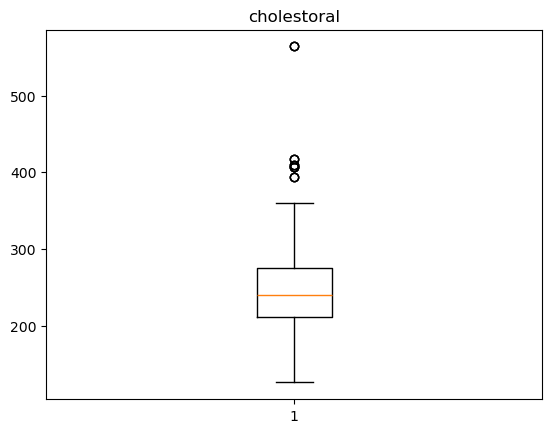

In [25]:
plt.boxplot(df["cholestoral"]) #3
plt.title("cholestoral")
plt.show()

In [26]:
q1=df['cholestoral'].quantile(0.25)
q3=df['cholestoral'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)  # UPERR BOUND
lb=q1-(1.5*iqr)  # LOWER BOUND

In [27]:
df.loc[df["cholestoral"]>ub]

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
123,65,Female,Non-anginal pain,140,417,Greater than 120 mg/ml,Normal,157,No,0.8,Downsloping,One,Fixed Defect,1
158,67,Female,Non-anginal pain,115,564,Lower than 120 mg/ml,Normal,160,No,1.6,Flat,Zero,Reversable Defect,1
179,56,Female,Typical angina,134,409,Lower than 120 mg/ml,Normal,150,Yes,1.9,Flat,Two,Reversable Defect,0
192,67,Female,Non-anginal pain,115,564,Lower than 120 mg/ml,Normal,160,No,1.6,Flat,Zero,Reversable Defect,1
255,62,Female,Typical angina,140,394,Lower than 120 mg/ml,Normal,157,No,1.2,Flat,Zero,Fixed Defect,1
450,63,Female,Typical angina,150,407,Lower than 120 mg/ml,Normal,154,No,4.0,Flat,Three,Reversable Defect,0
464,67,Female,Non-anginal pain,115,564,Lower than 120 mg/ml,Normal,160,No,1.6,Flat,Zero,Reversable Defect,1
481,63,Female,Typical angina,150,407,Lower than 120 mg/ml,Normal,154,No,4.0,Flat,Three,Reversable Defect,0
542,62,Female,Typical angina,140,394,Lower than 120 mg/ml,Normal,157,No,1.2,Flat,Zero,Fixed Defect,1
578,62,Female,Typical angina,140,394,Lower than 120 mg/ml,Normal,157,No,1.2,Flat,Zero,Fixed Defect,1


In [28]:
df.loc[df["cholestoral"]>ub,"cholestoral"]=ub

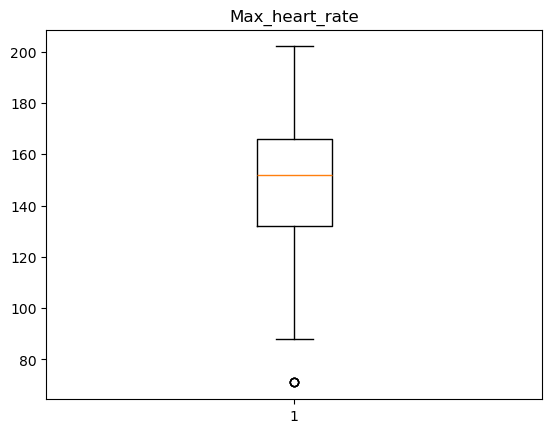

In [29]:
plt.boxplot(df["Max_heart_rate"])
plt.title("Max_heart_rate")
plt.show()

In [30]:
q1=df['Max_heart_rate'].quantile(0.25)
q3=df['Max_heart_rate'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)  # UPERR BOUND
lb=q1-(1.5*iqr)  # LOWER BOUND

In [31]:
df.loc[df["Max_heart_rate"]<lb]

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
267,67,Male,Typical angina,120,237,Lower than 120 mg/ml,ST-T wave abnormality,71,No,1.0,Flat,Zero,Fixed Defect,0
296,67,Male,Typical angina,120,237,Lower than 120 mg/ml,ST-T wave abnormality,71,No,1.0,Flat,Zero,Fixed Defect,0
378,67,Male,Typical angina,120,237,Lower than 120 mg/ml,ST-T wave abnormality,71,No,1.0,Flat,Zero,Fixed Defect,0
559,67,Male,Typical angina,120,237,Lower than 120 mg/ml,ST-T wave abnormality,71,No,1.0,Flat,Zero,Fixed Defect,0


In [32]:
df.loc[df["Max_heart_rate"]<lb,'Max_heart_rate']=lb

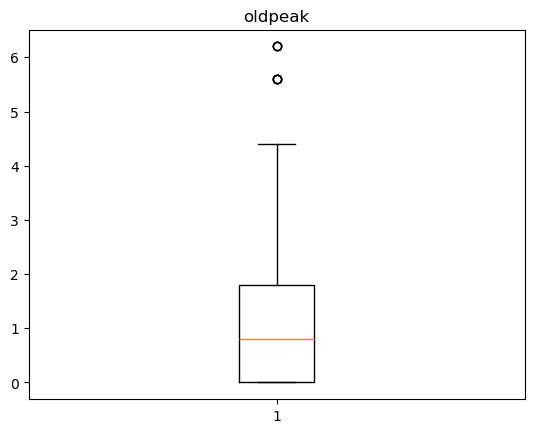

In [33]:
plt.boxplot(df["oldpeak"])
plt.title("oldpeak")
plt.show()

In [34]:
q1=df['oldpeak'].quantile(0.25)
q3=df['oldpeak'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)  # UPERR BOUND
lb=q1-(1.5*iqr)  # LOWER BOUND

In [35]:
df.loc[df['oldpeak']>ub]

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
54,55,Male,Typical angina,140,217,Lower than 120 mg/ml,ST-T wave abnormality,111,Yes,5.6,Upsloping,Zero,Reversable Defect,0
55,55,Male,Typical angina,140,217,Lower than 120 mg/ml,ST-T wave abnormality,111,Yes,5.6,Upsloping,Zero,Reversable Defect,0
69,62,Female,Typical angina,160,164,Lower than 120 mg/ml,Normal,145,No,6.2,Upsloping,Three,Reversable Defect,0
393,62,Female,Typical angina,160,164,Lower than 120 mg/ml,Normal,145,No,6.2,Upsloping,Three,Reversable Defect,0
526,62,Female,Typical angina,160,164,Lower than 120 mg/ml,Normal,145,No,6.2,Upsloping,Three,Reversable Defect,0
613,55,Male,Typical angina,140,217,Lower than 120 mg/ml,ST-T wave abnormality,111,Yes,5.6,Upsloping,Zero,Reversable Defect,0
833,55,Male,Typical angina,140,217,Lower than 120 mg/ml,ST-T wave abnormality,111,Yes,5.6,Upsloping,Zero,Reversable Defect,0


In [36]:
df.loc[df['oldpeak']>ub,'oldpeak']=ub

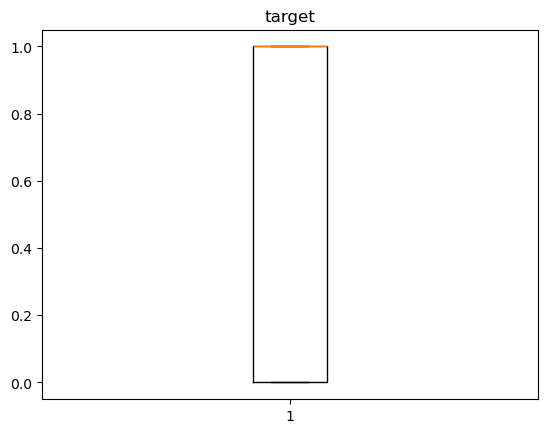

In [37]:
plt.boxplot(df["target"])
plt.title("target")
plt.show()

In [38]:
from scipy.stats import skew

In [39]:
skew(df["resting_blood_pressure"])

0.40169494817261425

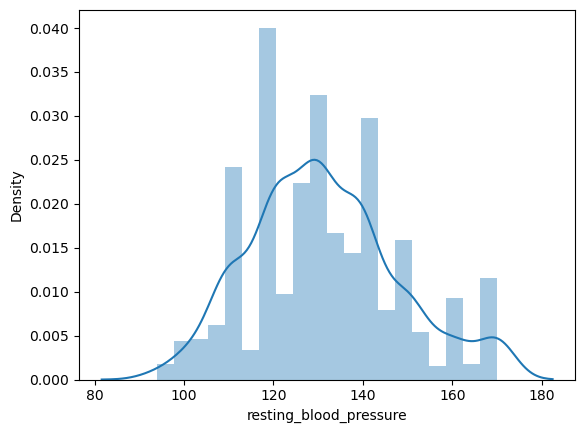

In [40]:
plt.figure()
sns.distplot(df['resting_blood_pressure'])
plt.show()

In [41]:
skew(df["cholestoral"])

0.34330985644581186

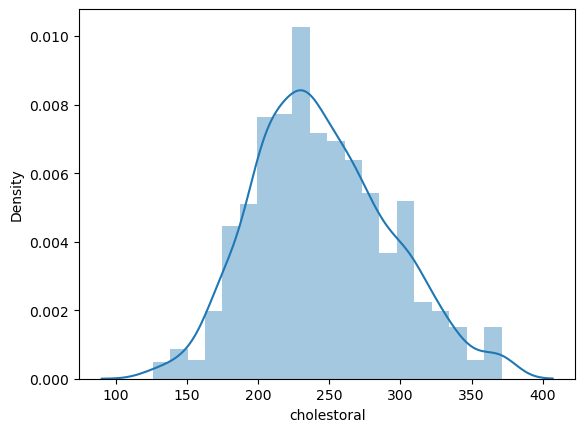

In [42]:
plt.figure()
sns.distplot(df['cholestoral'])
plt.show()

In [43]:
skew(df["Max_heart_rate"])

-0.4741644806677449

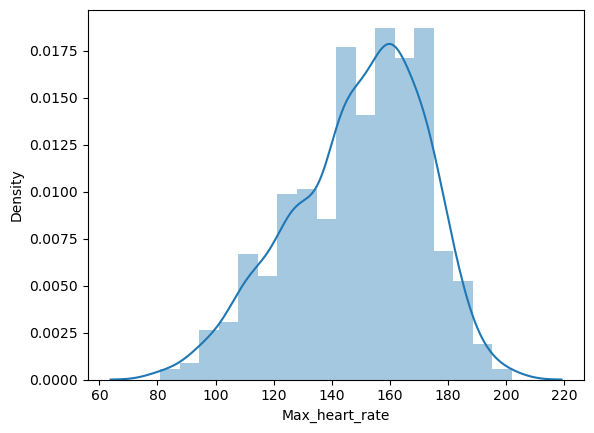

In [44]:
plt.figure()
sns.distplot(df['Max_heart_rate'])
plt.show()

In [45]:
skew(df['oldpeak'])

1.0178105342426422

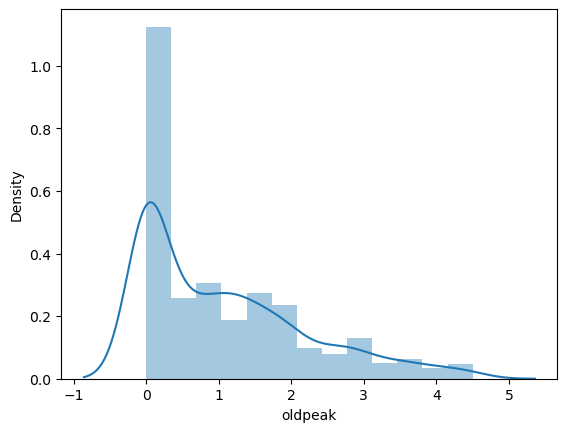

In [46]:
plt.figure()
sns.distplot(df['oldpeak'])
plt.show()

In [47]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [48]:
# label encoding

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()

In [51]:
df["sex"]=le.fit_transform(df[["sex"]])

In [52]:
df["chest_pain_type"]=le.fit_transform(df[["chest_pain_type"]])

In [53]:
df["fasting_blood_sugar"]=le.fit_transform(df[["fasting_blood_sugar"]])

In [54]:
df["rest_ecg"]=le.fit_transform(df[["rest_ecg"]])

In [55]:
df["exercise_induced_angina"]=le.fit_transform(df[["exercise_induced_angina"]])

In [56]:
df["slope"]=le.fit_transform(df[["slope"]])

In [57]:
df["vessels_colored_by_flourosopy"]=le.fit_transform(df[["vessels_colored_by_flourosopy"]])

In [58]:
df["thalassemia"]=le.fit_transform(df[["thalassemia"]])

In [59]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3,0
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3,0
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3,0
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3,0
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,1,2,164,1,0.0,0,4,0,1
1021,60,1,3,125,258,1,1,141,1,2.8,1,1,3,0
1022,47,1,3,110,275,1,1,118,1,1.0,1,1,0,0
1023,50,0,3,110,254,1,1,159,0,0.0,0,4,0,1


In [60]:
df.value_counts('thalassemia')

thalassemia
0    544
3    410
2     64
1      7
Name: count, dtype: int64

In [61]:
x = df.drop('target', axis= 1)  # remove the target column
x  

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,1,2,164,1,0.0,0,4,0
1021,60,1,3,125,258,1,1,141,1,2.8,1,1,3
1022,47,1,3,110,275,1,1,118,1,1.0,1,1,0
1023,50,0,3,110,254,1,1,159,0,0.0,0,4,0


In [62]:
y=df["target"]
y 

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [63]:
# training the data 

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=11)

In [66]:
x_train

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
566,50,0,3,110,254,1,1,159,0,0.0,0,4,0
134,54,1,1,108,309,1,2,156,0,0.0,0,4,3
712,45,0,1,112,160,1,2,138,0,0.0,1,4,0
545,48,1,1,110,229,1,2,168,0,1.0,2,4,3
183,42,1,2,130,180,1,2,150,0,0.0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,68,1,3,144,193,0,2,141,0,3.4,1,3,3
850,58,1,1,120,284,1,1,160,0,1.8,1,4,0
583,43,1,3,120,177,1,1,120,1,2.5,1,4,3
673,54,1,2,120,258,1,1,147,0,0.4,1,4,3


In [67]:
x_test

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
894,51,1,3,140,299,1,2,173,1,1.6,0,4,3
989,71,0,1,160,302,1,2,162,0,0.4,0,3,0
819,58,0,3,170,225,0,1,146,1,2.8,1,3,2
513,54,1,3,110,206,1,1,108,1,0.0,1,1,0
763,58,0,0,150,283,0,1,162,0,1.0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,59,1,0,170,270,1,1,145,0,4.2,2,4,3
681,59,1,3,170,326,1,1,140,1,3.4,2,4,3
833,55,1,3,140,217,1,2,111,1,4.5,2,4,3
707,56,0,1,140,294,1,1,153,0,1.3,1,4,0


In [68]:
# create a machine learning model 

# logistic Regression 

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
model=LogisticRegression()

In [71]:
model.fit(x_train,y_train)

LogisticRegression()

In [72]:
y_pred=model.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve,auc

In [74]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy*100)

Accuracy:  83.41463414634146


In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.82        97
           1       0.81      0.89      0.85       108

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



In [76]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[75, 22],
       [12, 96]], dtype=int64)

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay

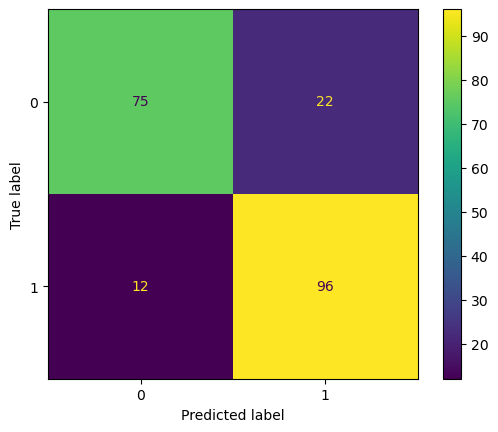

In [78]:
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [79]:
model.score(x_test,y_test)     # testing score

0.8341463414634146

In [80]:
model.score(x_train,y_train)    # training score

0.8402439024390244

In [81]:
y_pred_prob=model.predict_proba(x_test)
y_pred_prob

array([[0.7882034 , 0.2117966 ],
       [0.04864988, 0.95135012],
       [0.91040926, 0.08959074],
       [0.87235532, 0.12764468],
       [0.04422874, 0.95577126],
       [0.05765646, 0.94234354],
       [0.15898127, 0.84101873],
       [0.02033286, 0.97966714],
       [0.09954417, 0.90045583],
       [0.04384512, 0.95615488],
       [0.05023954, 0.94976046],
       [0.09116295, 0.90883705],
       [0.29560746, 0.70439254],
       [0.99045953, 0.00954047],
       [0.99045953, 0.00954047],
       [0.07940462, 0.92059538],
       [0.94565756, 0.05434244],
       [0.28859249, 0.71140751],
       [0.1201799 , 0.8798201 ],
       [0.72815936, 0.27184064],
       [0.95290093, 0.04709907],
       [0.24198491, 0.75801509],
       [0.23185592, 0.76814408],
       [0.15863212, 0.84136788],
       [0.06904526, 0.93095474],
       [0.07662201, 0.92337799],
       [0.09954417, 0.90045583],
       [0.6248141 , 0.3751859 ],
       [0.86153086, 0.13846914],
       [0.9861973 , 0.0138027 ],
       [0.

x_train

In [82]:
y_pred_prob=model.predict_proba(x_train)
y_pred_prob[:,1]

fpr,tpr,thresh=roc_curve(y_train,y_pred_prob[:,1])

In [83]:
fpr,tpr,thresh

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00746269, 0.00746269, 0.00746269, 0.00746269,
        0.00746269, 0.00746269, 0.00746269, 0.00746269, 0.00746269,
        0.00746269, 0.00746269, 0.00746269, 0.00746269, 0.00746269,
        0.00746269, 0.00746269, 0.00746269, 0.00746269, 0.00746269,
        0.01492537, 0.01492537, 0.01492537, 0.01492537, 0.01492537,
        0.01492537, 0.01492537, 0.0199005 , 0.0199005 , 0.0199005 ,
        0.0199005 , 0.02487562, 0.02487562, 0.02487562, 0.02487562,
        0.02487562, 0.03233831, 0.03233831, 0.03233831, 0.03233831,
        0.03233831, 0.04726368, 0.04726368, 0.04726368, 0.04726368,
        0.04726368, 0.04726368, 0.05472637, 0.05472637, 0.05472637,
        0.05472637, 0.05472637, 0.05472637, 0.06

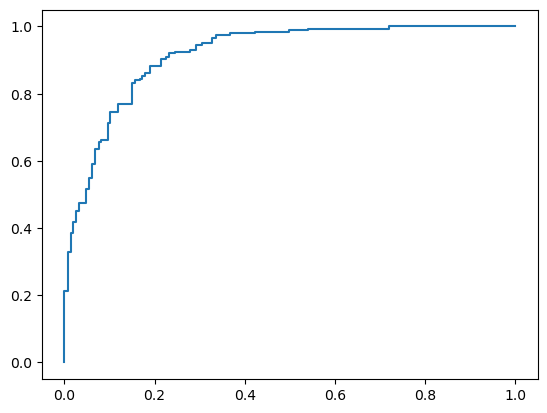

In [84]:
plt.plot(fpr,tpr)
plt.show


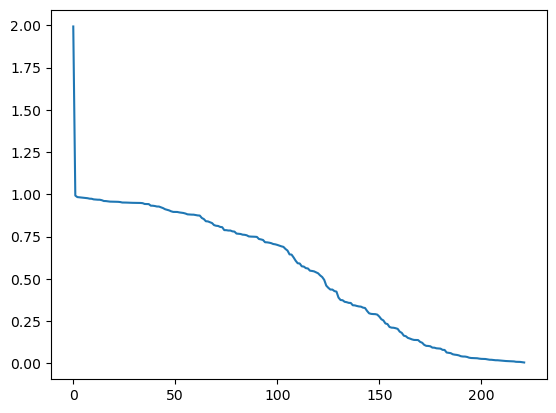

In [85]:
plt.plot(thresh)
plt.show()

In [86]:
auc_value=auc(fpr,tpr)
auc_value

0.9168213954152682

# knn algorithm 

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()

In [89]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy*100)

Accuracy:  83.41463414634146


In [90]:
from sklearn.metrics import ConfusionMatrixDisplay

In [91]:
print(confusion_matrix(y_test, y_pred))

[[75 22]
 [12 96]]


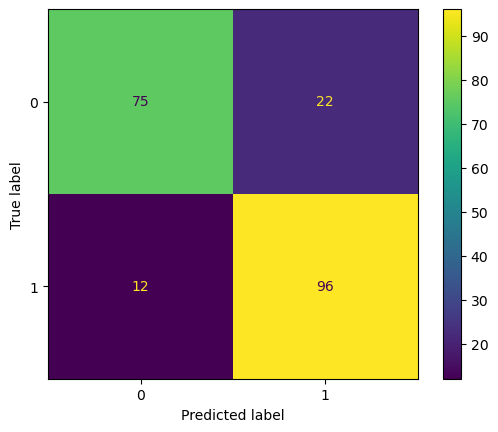

In [92]:
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.82        97
           1       0.81      0.89      0.85       108

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



In [94]:
model.score(x_train,y_train)

0.8402439024390244

In [95]:
model.score(x_test,y_test)

0.8341463414634146